In [1]:
import numpy as np
from utils import JPtools as jpt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import seaborn as sns
from sklearn.cross_validation import train_test_split
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

Using TensorFlow backend.
/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Couldn't import dot_parser, loading of dot files will not be possible.


/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
NETWORK_DIMS = [20,40,20,10,7,3]
jae = jpt.JPAutoEncoder(NETWORK_DIMS)

In [3]:
X, xc = jpt.manyPsf(batch_size= 555)
X_train, X_val = train_test_split(X, test_size = 0.1, random_state = 42)
xc_train, xc_val = train_test_split(xc, test_size = 0.1, random_state = 42)

In [17]:
%%capture
jae.pretrain(X_train, num_epoch = 200)

In [18]:
%%capture
jae.fine_train(X_train, num_epoch = 3000)

In [19]:
model = jae.model

In [32]:
model.layers[0].output_reconstruction = True
model.compile(optimizer = 'sgd', loss = 'mse')

In [21]:
h_pred = model.predict(X_val)

In [24]:
h_pred
#xc_val

array([[ 0.        ,  1.44303489,  0.        ],
       [ 0.        ,  0.05148973,  0.        ],
       [ 0.        ,  4.74082899,  0.        ],
       [ 0.        ,  3.06053305,  0.        ],
       [ 0.        ,  3.68287683,  0.        ],
       [ 0.        ,  0.13064519,  0.        ],
       [ 0.        ,  4.23533249,  0.        ],
       [ 0.        ,  2.44177604,  0.        ],
       [ 0.        ,  4.38275814,  0.        ],
       [ 0.        ,  0.66712594,  0.        ],
       [ 0.        ,  0.4301196 ,  0.        ],
       [ 0.        ,  3.67507744,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.77571768,  0.        ],
       [ 0.        ,  4.99856138,  0.        ],
       [ 0.        ,  0.48086047,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.80496335,  0.        ],
       [ 0.        ,  1.24663782,  0.        ],
       [ 0.        ,  4.61162472,  0.   

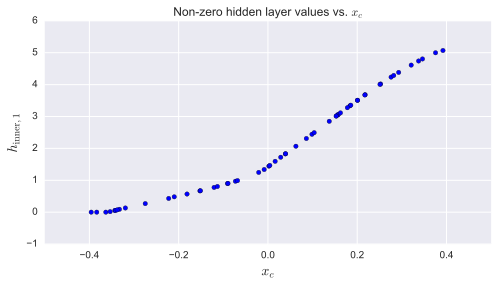

In [54]:
f = plt.figure()
f.set_size_inches(8,4)
for i in xrange(len(h_pred)):
    plt.scatter(xc_val[i], h_pred[i][1])
plt.xlabel(r'$x_c$', size = 14)
plt.ylabel(r'$h_{\mathrm{inner},1}$', size = 14)
plt.title(r'Non-zero hidden layer values vs. $x_c$')

plt.savefig('20-40-20-10-7-3-hidden-values.pdf')
    
    

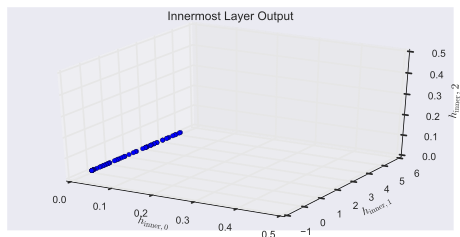

In [55]:
from mpl_toolkits.mplot3d import Axes3D
f = plt.figure()
f.set_size_inches(8,4)
ax = f.add_subplot(111, projection='3d')
for i in xrange(len(h_pred)):
    ax.scatter(h_pred[i][0], h_pred[i][1], h_pred[i][2])
ax.set_xlim3d(0,0.5)
ax.set_zlim3d(0,0.5)
ax.set_xlabel(r'$h_{\mathrm{inner},0}$')
ax.set_ylabel(r'$h_{\mathrm{inner},1}$')
ax.set_zlabel(r'$h_{\mathrm{inner}},2$')
plt.title("Innermost Layer Output")
plt.savefig("innermost-output.pdf")

In [9]:
import matplotlib.cm as cm

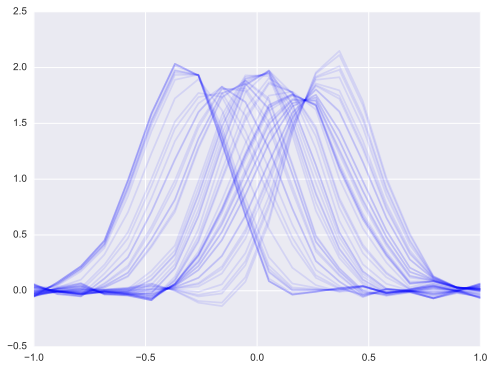

In [33]:
x_pred = model.predict(X_val)
f = plt.figure()
f.set_size_inches(8,6)
for i in xrange(len(x_pred)):
    plt.plot(np.linspace(-1,1,20), x_pred[i], c = 'b', alpha = 0.1)

ValueError: Cannot convert argument type <type 'numpy.float64'> to rgba array

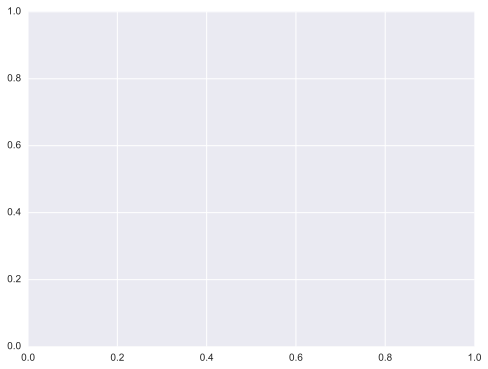

In [10]:
f = plt.figure()
f.set_size_inches(8,6)
for i in xrange(len(h_pred)):
    jitter = 0.1 * np.random.normal()
    plt.scatter([-1+jitter,0+jitter,1+jitter],h_pred[i], c = xc_val[i], cmap = cm.jet)
    
plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$h_{inner}$', size = 14)